### Background
To analyse the homogeneous state we can look at one patch in isolation.
The approach to find the two-parameter bifurcation diagram is described in appendix B of the paper.


In [1]:
import numpy as np
import sympy as sp
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt

#### Fig 3a: One-Parameter Bifurcation

In [2]:
# Parameters
beta = 0.6
gamma = 4
M = 1 # system normalised to 1 (i.e., x is probability to find opinion x)

In [3]:
# Analytically find the one parameter bifurcation diagram (dx/dt=0 and solve for alpha)
def one_param_bifurcation(x, b, c, N):
    return (b*(N-x) + c*x**2*(N-x) - c*x*(N-x)**2) / x

x_values = np.linspace(0.01, M, 1000)
alpha_values = one_param_bifurcation(x_values, beta, gamma, M)
# Maxima and minima are the saddle node bifurcation points
local_maxima_idx = argrelextrema(alpha_values, np.greater)[0]
local_minima_idx = argrelextrema(alpha_values, np.less)[0]

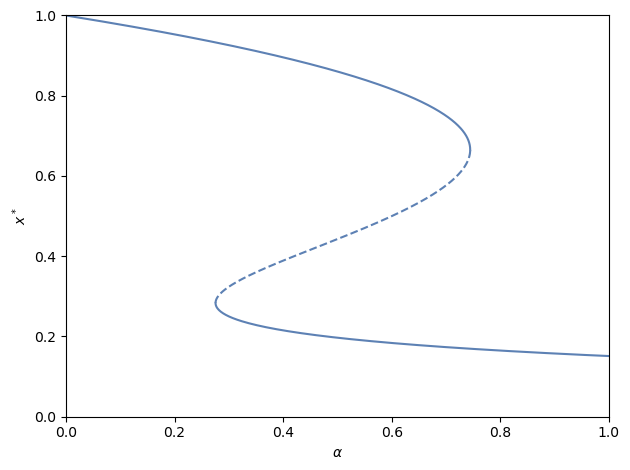

In [4]:
plt.plot(alpha_values[:local_minima_idx[0]], x_values[:local_minima_idx[0]], '-', color='#5d81b4')
plt.plot(alpha_values[local_minima_idx[0]:local_maxima_idx[0]], x_values[local_minima_idx[0]:local_maxima_idx[0]], '--', color='#5d81b4')
plt.plot(alpha_values[local_maxima_idx[0]:], x_values[local_maxima_idx[0]:], '-', color='#5d81b4')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$x^*$')
plt.xlim([0,1])
plt.ylim([0,1])
plt.tight_layout()

#### Fig 3b: Two-Parameter Bifurcation Diagram

In [5]:
# Define equation in sympy to solve symbolically
x_, alpha_, beta_, gamma_, M_ = sp.symbols('x_, alpha_, beta_, gamma_, M_')
x_dot = -alpha_*x_ + beta_*(M_-x_) + gamma_*x_**2*(M_-x_) - gamma_*x_*(M_-x_)**2

# Condition 1: Fix Point
condition_1 = sp.solve(x_dot, alpha_)[0]
# Condition 2: solve derivative for 0
condition_2 = sp.diff(condition_1, x_)
condition_2 = sp.solve(condition_2, gamma_)[0]
# Resubstitue condition 2 in condition 1
condition_1 = condition_1.subs(gamma_, condition_2)

In [6]:
# Solve in parametric form
x_values = np.linspace(0.001, M, 1000)

alpha_values = []
gamma_values = []

for x_val in x_values:
    # Substitute fixed parameter values
    cond_1_eval = condition_1.subs({beta_: beta, M_: M})
    cond_2_eval = condition_2.subs({beta_: beta, M_: M})
    # Turn into numpy function
    cond_alpha = sp.lambdify((x_), cond_1_eval, modules='numpy')
    cond_gamma = sp.lambdify((x_), cond_2_eval, modules='numpy')

    alpha_value = cond_alpha(x_val)
    gamma_value = cond_gamma(x_val)
    if (alpha_value >= 0 and gamma_value >= 0):
        alpha_values.append(alpha_value)
        gamma_values.append(gamma_value)


<lambdifygenerated-1499>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -0.6 - 0.6/(3 - 4*x_) + 0.6/x_ + 0.6/(x_*(3 - 4*x_)) - 0.6*(1 - x_)**2/(x_**2*(3 - 4*x_))
<lambdifygenerated-1499>:2: RuntimeWarning: invalid value encountered in scalar add
  return -0.6 - 0.6/(3 - 4*x_) + 0.6/x_ + 0.6/(x_*(3 - 4*x_)) - 0.6*(1 - x_)**2/(x_**2*(3 - 4*x_))
<lambdifygenerated-1500>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 0.6/(x_**2*(3 - 4*x_))


(0.0, 10.0)

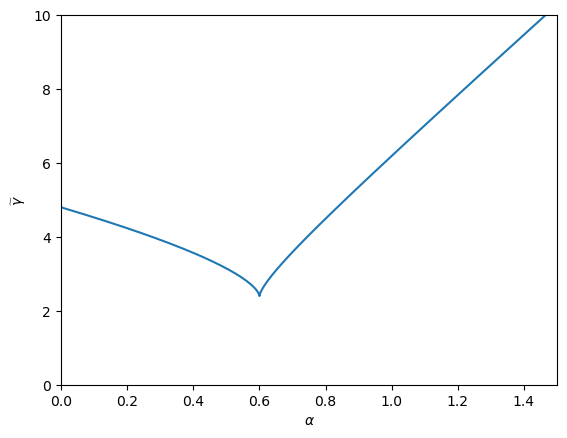

In [7]:
plt.plot(alpha_values, gamma_values)
plt.xlabel(r"$ \alpha $")
plt.ylabel(r"$ \widetilde{\gamma} $")
plt.xlim([0, 1.5])
plt.ylim([0, 10])
